# 方差过滤

In [1]:
#1.导入所需要的库
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import time
import numpy as np
from sklearn.preprocessing import StandardScaler

In [2]:
# 2.导入数据集，探索数据
data = pd.read_csv(r"C:\Users\ASUS\Desktop\EEG\feature_analysis\ours\S7\s7_32.csv")

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1325 entries, 0 to 1324
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mean_0         1325 non-null   float64
 1   mean_1         1325 non-null   float64
 2   mean_2         1325 non-null   float64
 3   mean_3         1325 non-null   float64
 4   mean_d_h2h1_0  1325 non-null   float64
 5   mean_d_h2h1_1  1325 non-null   float64
 6   mean_d_h2h1_2  1325 non-null   float64
 7   mean_d_h2h1_3  1325 non-null   float64
 8   std_0          1325 non-null   float64
 9   std_1          1325 non-null   float64
 10  std_2          1325 non-null   float64
 11  std_3          1325 non-null   float64
 12  std_d_h2h1_0   1325 non-null   float64
 13  std_d_h2h1_1   1325 non-null   float64
 14  std_d_h2h1_2   1325 non-null   float64
 15  std_d_h2h1_3   1325 non-null   float64
 16  max_0          1325 non-null   float64
 17  max_1          1325 non-null   float64
 18  max_2   

In [3]:
data.shape

(1325, 33)

In [4]:
data.head()

mean_0  mean_1  mean_2   mean_3  mean_d_h2h1_0  mean_d_h2h1_1  \
0  0.1530  -0.137  0.1670 -0.03840        -0.8430         0.0311   
1 -0.7460   0.144 -0.1160  0.05970         5.0300        -0.6760   
2 -4.7200   0.935 -0.5150 -0.00777        -3.4600         0.2290   
3  0.0127   0.154 -0.0551  0.01070         0.0886        -0.5840   
4  1.6400   1.160 -0.1070 -0.08370        -6.4100        -0.4470   

   mean_d_h2h1_2  mean_d_h2h1_3  std_0  std_1  ...  max_d_h2h1_3  min_0  \
0       -0.14000       -0.00347   18.2   12.4  ...         -1.06  -43.3   
1       -0.00497       -0.07460   43.8   16.6  ...          3.81 -127.0   
2       -0.41300        0.95000  122.0   73.8  ...         35.90 -234.0   
3        0.33700        0.00153   12.6   13.9  ...        -22.60  -33.5   
4        0.28600       -0.31400   57.0   52.9  ...        -47.60 -138.0   

   min_1  min_2  min_3  min_d_h2h1_0  min_d_h2h1_1  min_d_h2h1_2  \
0  -31.2  -26.0  -17.8         -3.83          8.91         -1.57   
1  -39.9  -38.2  -14.8        -41.30        -14.30         -6.16   
2 -175.0 -125.0 -111.0         62.80         21.30        -21.40   
3  -34.4  -26.4  -28.2          8.59        -13.90         -4.42   
4 -171.0  -54.0 -101.0         82.20        118.00        -23.10   

   min_d_h2h1_3  Label  
0          1.96    2.0  
1         -4.06    0.0  
2        -35.60    0.0  
3         16.00    2.0  
4         68.40    0.0  

[5 rows x 33 columns]

In [5]:
data.describe()

mean_0       mean_1       mean_2       mean_3  mean_d_h2h1_0  \
count  1325.000000  1325.000000  1325.000000  1325.000000    1325.000000   
mean      0.012854    -0.004540     0.000779     0.000540       0.138249   
std       1.172551     0.370256     0.180058     0.086906       4.812652   
min      -4.930000    -2.370000    -0.799000    -0.804000     -27.300000   
25%      -0.366000    -0.134000    -0.077200    -0.031000      -1.210000   
50%       0.004460     0.003570     0.003030     0.000093       0.033800   
75%       0.352000     0.135000     0.079900     0.029700       1.420000   
max       7.820000     1.840000     0.876000     0.760000      31.700000   

       mean_d_h2h1_1  mean_d_h2h1_2  mean_d_h2h1_3        std_0        std_1  \
count    1325.000000    1325.000000    1325.000000  1325.000000  1325.000000   
mean        0.037888      -0.031639      -0.002952    42.983457    23.254234   
std         1.295229       0.729980       0.304307    46.920021    22.442636   
min        -8.280000      -5.140000      -1.530000     8.570000     6.620000   
25%        -0.414000      -0.326000      -0.128000    15.400000    11.500000   
50%         0.010700      -0.035400      -0.008350    25.500000    14.300000   
75%         0.433000       0.270000       0.133000    48.400000    24.700000   
max        11.900000       4.050000       1.420000   373.000000   158.000000   

       ...  max_d_h2h1_3        min_0        min_1        min_2        min_3  \
count  ...   1325.000000  1325.000000  1325.000000  1325.000000  1325.000000   
mean   ...     -1.380364  -116.444000   -64.639623   -45.579019   -38.156151   
std    ...     24.702563   132.596571    63.814858    38.745351    32.301633   
min    ...   -185.000000 -1260.000000  -447.000000  -319.000000  -258.000000   
25%    ...     -7.470000  -135.000000   -74.000000   -47.600000   -42.000000   
50%    ...     -0.632000   -64.100000   -37.400000   -30.800000   -26.300000   
75%    ...      6.510000   -38.800000   -28.600000   -24.400000   -19.900000   
max    ...    156.000000   -17.600000   -15.500000   -12.100000   -10.100000   

       min_d_h2h1_0  min_d_h2h1_1  min_d_h2h1_2  min_d_h2h1_3        Label  
count   1325.000000   1325.000000   1325.000000   1325.000000  1325.000000  
mean      -3.257396      0.261363      0.310560      1.421884     0.963774  
std       92.208693     44.871768     28.185445     24.141639     0.849854  
min     -712.000000   -286.000000   -198.000000   -165.000000     0.000000  
25%      -18.200000    -10.300000     -7.810000     -6.290000     0.000000  
50%        0.812000     -0.094900      0.404000      0.544000     1.000000  
75%       17.600000     10.700000      8.830000      7.680000     2.000000  
max      702.000000    304.000000    296.000000    173.000000     2.000000  

[8 rows x 33 columns]

In [6]:
from sklearn.preprocessing import LabelEncoder
y = data.iloc[:,-1]#要输入的是标签，不是特征矩阵，所以允许一维

In [7]:
le = LabelEncoder()  # 实例化
le = le.fit(y) # 导入数据
label = le.transform(y) # transform接口调取数据
le.classes_  #属性.classes_查看标签中究竟有多少类别
label

array([2, 0, 0, ..., 0, 0, 0], dtype=int64)

In [8]:
le.fit_transform(y)  #也可以直接fit_transform一步到位

array([2, 0, 0, ..., 0, 0, 0], dtype=int64)

In [9]:
le.inverse_transform(label)  #使用inverse_transform可以逆转

array([2., 0., 0., ..., 0., 0., 0.])

In [10]:
data.iloc[:,-1] = label  #让标签等于我们运行出来的结果
data.head()


mean_0  mean_1  mean_2   mean_3  mean_d_h2h1_0  mean_d_h2h1_1  \
0  0.1530  -0.137  0.1670 -0.03840        -0.8430         0.0311   
1 -0.7460   0.144 -0.1160  0.05970         5.0300        -0.6760   
2 -4.7200   0.935 -0.5150 -0.00777        -3.4600         0.2290   
3  0.0127   0.154 -0.0551  0.01070         0.0886        -0.5840   
4  1.6400   1.160 -0.1070 -0.08370        -6.4100        -0.4470   

   mean_d_h2h1_2  mean_d_h2h1_3  std_0  std_1  ...  max_d_h2h1_3  min_0  \
0       -0.14000       -0.00347   18.2   12.4  ...         -1.06  -43.3   
1       -0.00497       -0.07460   43.8   16.6  ...          3.81 -127.0   
2       -0.41300        0.95000  122.0   73.8  ...         35.90 -234.0   
3        0.33700        0.00153   12.6   13.9  ...        -22.60  -33.5   
4        0.28600       -0.31400   57.0   52.9  ...        -47.60 -138.0   

   min_1  min_2  min_3  min_d_h2h1_0  min_d_h2h1_1  min_d_h2h1_2  \
0  -31.2  -26.0  -17.8         -3.83          8.91         -1.57   
1  -39.9  -38.2  -14.8        -41.30        -14.30         -6.16   
2 -175.0 -125.0 -111.0         62.80         21.30        -21.40   
3  -34.4  -26.4  -28.2          8.59        -13.90         -4.42   
4 -171.0  -54.0 -101.0         82.20        118.00        -23.10   

   min_d_h2h1_3  Label  
0          1.96      2  
1         -4.06      0  
2        -35.60      0  
3         16.00      2  
4         68.40      0  

[5 rows x 33 columns]

In [11]:
print(data.columns)

Index(['mean_0', 'mean_1', 'mean_2', 'mean_3', 'mean_d_h2h1_0',
       'mean_d_h2h1_1', 'mean_d_h2h1_2', 'mean_d_h2h1_3', 'std_0', 'std_1',
       'std_2', 'std_3', 'std_d_h2h1_0', 'std_d_h2h1_1', 'std_d_h2h1_2',
       'std_d_h2h1_3', 'max_0', 'max_1', 'max_2', 'max_3', 'max_d_h2h1_0',
       'max_d_h2h1_1', 'max_d_h2h1_2', 'max_d_h2h1_3', 'min_0', 'min_1',
       'min_2', 'min_3', 'min_d_h2h1_0', 'min_d_h2h1_1', 'min_d_h2h1_2',
       'min_d_h2h1_3', 'Label'],
      dtype='object')


In [12]:
data['Label']

0       2
1       0
2       0
3       2
4       0
       ..
1320    2
1321    1
1322    0
1323    0
1324    0
Name: Label, Length: 1325, dtype: int64

In [13]:
data.shape

(1325, 33)

In [14]:
x = data.iloc[:,0:32]
x.head()

mean_0  mean_1  mean_2   mean_3  mean_d_h2h1_0  mean_d_h2h1_1  \
0  0.1530  -0.137  0.1670 -0.03840        -0.8430         0.0311   
1 -0.7460   0.144 -0.1160  0.05970         5.0300        -0.6760   
2 -4.7200   0.935 -0.5150 -0.00777        -3.4600         0.2290   
3  0.0127   0.154 -0.0551  0.01070         0.0886        -0.5840   
4  1.6400   1.160 -0.1070 -0.08370        -6.4100        -0.4470   

   mean_d_h2h1_2  mean_d_h2h1_3  std_0  std_1  ...  max_d_h2h1_2  \
0       -0.14000       -0.00347   18.2   12.4  ...         -7.94   
1       -0.00497       -0.07460   43.8   16.6  ...          7.15   
2       -0.41300        0.95000  122.0   73.8  ...         30.20   
3        0.33700        0.00153   12.6   13.9  ...          5.57   
4        0.28600       -0.31400   57.0   52.9  ...         31.40   

   max_d_h2h1_3  min_0  min_1  min_2  min_3  min_d_h2h1_0  min_d_h2h1_1  \
0         -1.06  -43.3  -31.2  -26.0  -17.8         -3.83          8.91   
1          3.81 -127.0  -39.9  -38.2  -14.8        -41.30        -14.30   
2         35.90 -234.0 -175.0 -125.0 -111.0         62.80         21.30   
3        -22.60  -33.5  -34.4  -26.4  -28.2          8.59        -13.90   
4        -47.60 -138.0 -171.0  -54.0 -101.0         82.20        118.00   

   min_d_h2h1_2  min_d_h2h1_3  
0         -1.57          1.96  
1         -6.16         -4.06  
2        -21.40        -35.60  
3         -4.42         16.00  
4        -23.10         68.40  

[5 rows x 32 columns]

In [15]:
x.describe()

mean_0       mean_1       mean_2       mean_3  mean_d_h2h1_0  \
count  1325.000000  1325.000000  1325.000000  1325.000000    1325.000000   
mean      0.012854    -0.004540     0.000779     0.000540       0.138249   
std       1.172551     0.370256     0.180058     0.086906       4.812652   
min      -4.930000    -2.370000    -0.799000    -0.804000     -27.300000   
25%      -0.366000    -0.134000    -0.077200    -0.031000      -1.210000   
50%       0.004460     0.003570     0.003030     0.000093       0.033800   
75%       0.352000     0.135000     0.079900     0.029700       1.420000   
max       7.820000     1.840000     0.876000     0.760000      31.700000   

       mean_d_h2h1_1  mean_d_h2h1_2  mean_d_h2h1_3        std_0        std_1  \
count    1325.000000    1325.000000    1325.000000  1325.000000  1325.000000   
mean        0.037888      -0.031639      -0.002952    42.983457    23.254234   
std         1.295229       0.729980       0.304307    46.920021    22.442636   
min        -8.280000      -5.140000      -1.530000     8.570000     6.620000   
25%        -0.414000      -0.326000      -0.128000    15.400000    11.500000   
50%         0.010700      -0.035400      -0.008350    25.500000    14.300000   
75%         0.433000       0.270000       0.133000    48.400000    24.700000   
max        11.900000       4.050000       1.420000   373.000000   158.000000   

       ...  max_d_h2h1_2  max_d_h2h1_3        min_0        min_1        min_2  \
count  ...   1325.000000   1325.000000  1325.000000  1325.000000  1325.000000   
mean   ...     -0.570391     -1.380364  -116.444000   -64.639623   -45.579019   
std    ...     29.609954     24.702563   132.596571    63.814858    38.745351   
min    ...   -312.000000   -185.000000 -1260.000000  -447.000000  -319.000000   
25%    ...     -9.670000     -7.470000  -135.000000   -74.000000   -47.600000   
50%    ...     -1.100000     -0.632000   -64.100000   -37.400000   -30.800000   
75%    ...      7.420000      6.510000   -38.800000   -28.600000   -24.400000   
max    ...    231.000000    156.000000   -17.600000   -15.500000   -12.100000   

             min_3  min_d_h2h1_0  min_d_h2h1_1  min_d_h2h1_2  min_d_h2h1_3  
count  1325.000000   1325.000000   1325.000000   1325.000000   1325.000000  
mean    -38.156151     -3.257396      0.261363      0.310560      1.421884  
std      32.301633     92.208693     44.871768     28.185445     24.141639  
min    -258.000000   -712.000000   -286.000000   -198.000000   -165.000000  
25%     -42.000000    -18.200000    -10.300000     -7.810000     -6.290000  
50%     -26.300000      0.812000     -0.094900      0.404000      0.544000  
75%     -19.900000     17.600000     10.700000      8.830000      7.680000  
max     -10.100000    702.000000    304.000000    296.000000    173.000000  

[8 rows x 32 columns]

In [16]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(x,y,test_size=0.2)
print(Xtrain.shape,Xtest.shape,Ytrain.shape,Ytest.shape)

(1060, 32) (265, 32) (1060,) (265,)


KNeighborsClassifier
****Results****
Accuracy: 67.9245%
Log Loss: 4.187309030138396
SVC
****Results****
Accuracy: 62.6415%
Log Loss: 0.9188980598889246
NuSVC
****Results****
Accuracy: 64.5283%
Log Loss: 0.8409374412141223
RandomForestClassifier
****Results****
Accuracy: 90.9434%
Log Loss: 0.403156432792746
LinearDiscriminantAnalysis
****Results****
Accuracy: 53.2075%
Log Loss: 1.0228583411252266
QuadraticDiscriminantAnalysis
****Results****
Accuracy: 60.3774%
Log Loss: 5.817871481990048


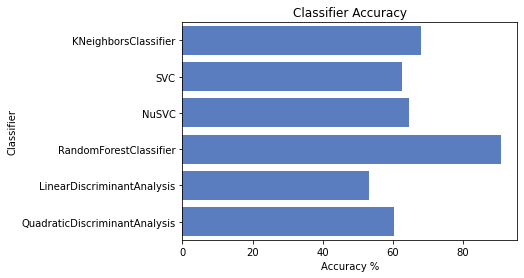

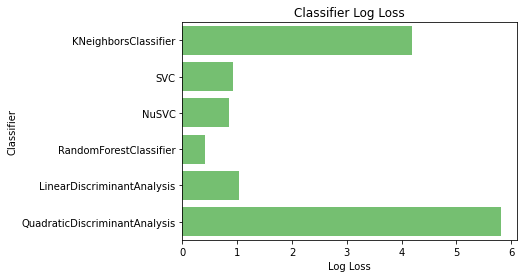

In [17]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier  # k近邻算法
from sklearn.svm import SVC, LinearSVC, NuSVC   #支持向量机分类器、线性支持向量机分类器、核支持向量分类
from sklearn.tree import DecisionTreeClassifier   # 决策树
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier   # 随机森林、AdaBoost、GradientBoost
from sklearn.naive_bayes import GaussianNB    #朴素贝叶斯GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis   #线性判别分析
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis   #二次判别分析
import pandas as pd
import seaborn as sns

classifiers = [
    KNeighborsClassifier(2),
    SVC(kernel="rbf",probability=True),
    NuSVC(probability=True),
#     DecisionTreeClassifier(),
    RandomForestClassifier(),
#     AdaBoostClassifier(),
#     GradientBoostingClassifier(),
#     GaussianNB(),
    LinearDiscriminantAnalysis(solver='svd'),
    QuadraticDiscriminantAnalysis()]

# 结果可视化
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(Xtrain, Ytrain)
    name = clf.__class__.__name__

    print("="*30)
    print(name)

    print('****Results****')
    train_predictions = clf.predict(Xtest)
    acc = accuracy_score(Ytest, train_predictions)
    print("Accuracy: {:.4%}".format(acc))

    train_predictions = clf.predict_proba(Xtest)
    ll = log_loss(Ytest, train_predictions)
    print("Log Loss: {}".format(ll))

    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)

print("="*30)
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()

In [18]:
import os
from numpy import loadtxt
import xgboost as xgb
from numpy import sort
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn import datasets
from xgboost import plot_importance
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectFromModel
import warnings
from matplotlib import  pyplot
import matplotlib.pyplot as plt
import matplotlib.pyplot as plot
warnings.filterwarnings("ignore")
# 加载数据集

CV accuracy scores:[0.94339623 0.9245283  0.94339623 0.93396226 0.91509434 0.89622642
 0.88679245 0.86792453 0.85849057 0.87735849]
Accuracy for XGBoost Classifier :  0.9047169811320757
[0.02517417 0.01893557 0.02638549 0.03811595 0.01965984 0.02033717
 0.01589684 0.02398098 0.19091734 0.04297547 0.02331614 0.03246624
 0.02600428 0.01737102 0.0269284  0.0282326  0.06920296 0.02558166
 0.02523953 0.0395538  0.01685135 0.02421587 0.02357783 0.01487701
 0.03657637 0.02092084 0.02158654 0.02471712 0.02308818 0.02149237
 0.02207752 0.01374358]


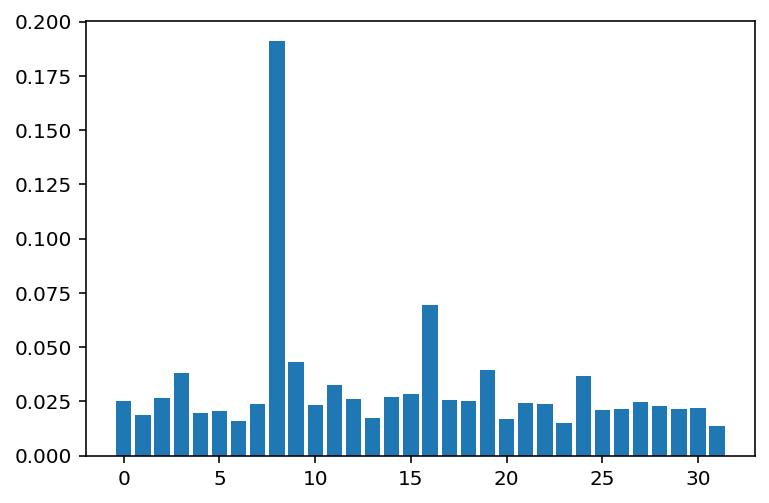

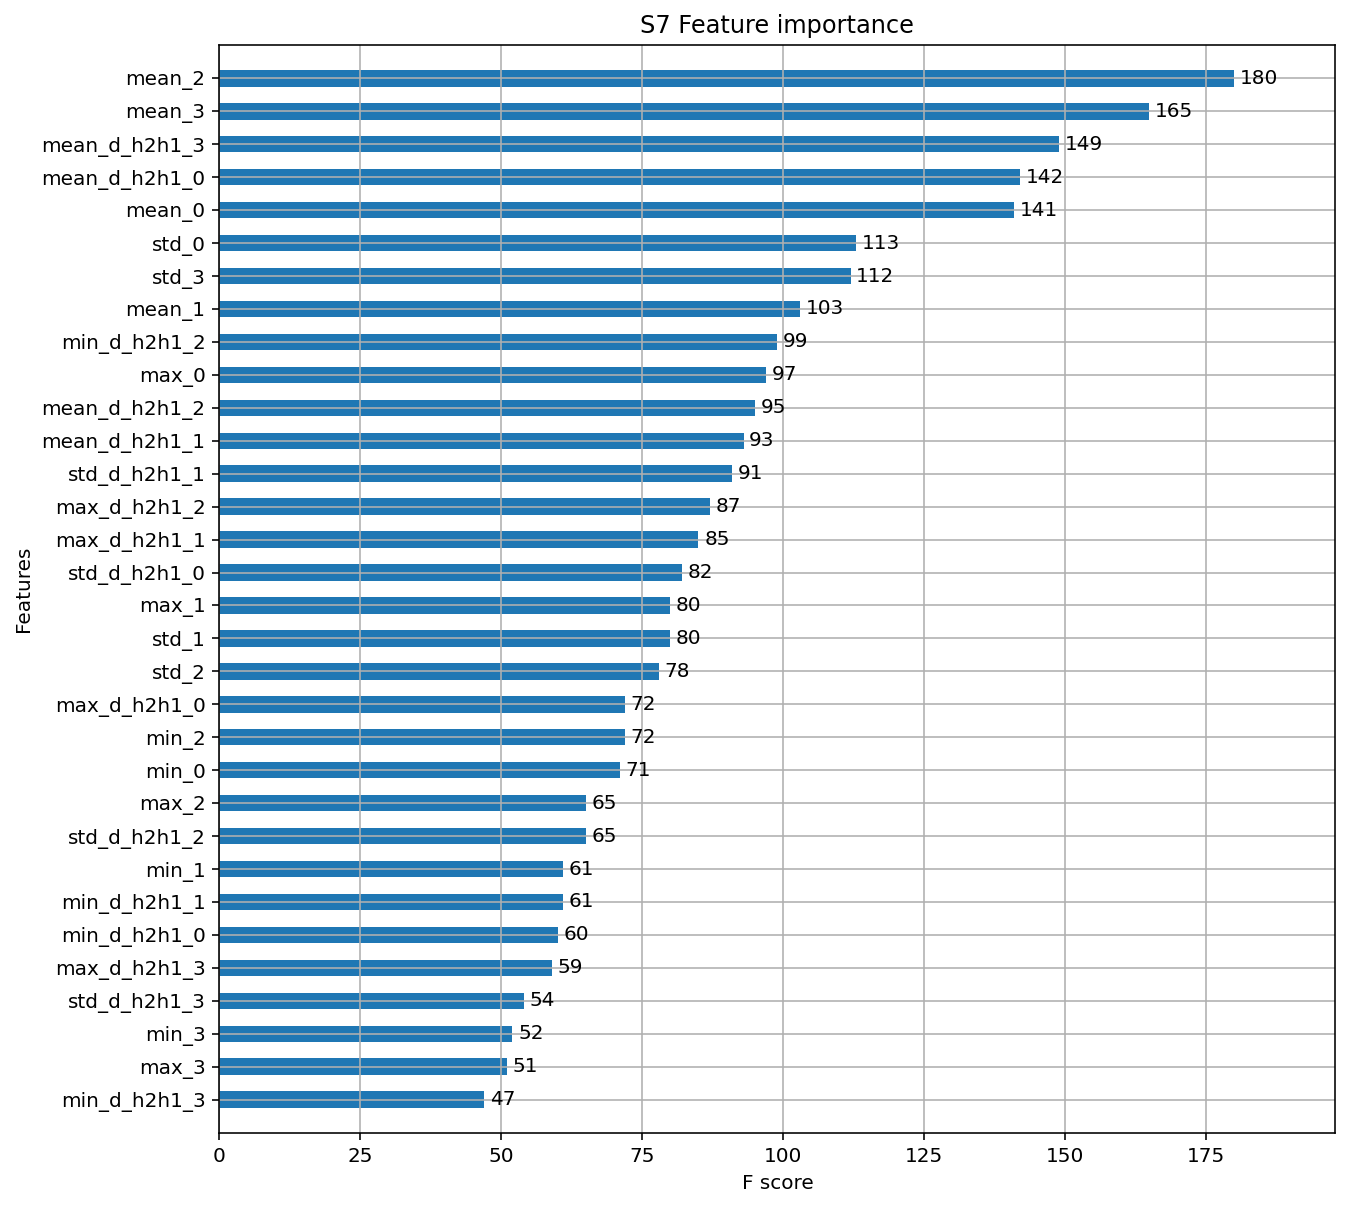

Accuracy: 87.92%
[0.01374358 0.01487701 0.01589684 0.01685135 0.01737102 0.01893557
 0.01965984 0.02033717 0.02092084 0.02149237 0.02158654 0.02207752
 0.02308818 0.02331614 0.02357783 0.02398098 0.02421587 0.02471712
 0.02517417 0.02523953 0.02558166 0.02600428 0.02638549 0.0269284
 0.0282326  0.03246624 0.03657637 0.03811595 0.0395538  0.04297547
 0.06920296 0.19091734]
Thresh=0.014, n=32, Accuracy: 88.68%
Thresh=0.015, n=31, Accuracy: 88.68%
Thresh=0.016, n=30, Accuracy: 89.43%
Thresh=0.017, n=29, Accuracy: 88.68%
Thresh=0.017, n=28, Accuracy: 89.43%
Thresh=0.019, n=27, Accuracy: 89.43%
Thresh=0.020, n=26, Accuracy: 89.43%
Thresh=0.020, n=25, Accuracy: 91.70%
Thresh=0.021, n=24, Accuracy: 90.19%
Thresh=0.021, n=23, Accuracy: 90.94%
Thresh=0.022, n=22, Accuracy: 90.94%
Thresh=0.022, n=21, Accuracy: 92.45%
Thresh=0.023, n=20, Accuracy: 91.70%
Thresh=0.023, n=19, Accuracy: 92.45%
Thresh=0.024, n=18, Accuracy: 92.45%
Thresh=0.024, n=17, Accuracy: 90.94%
Thresh=0.024, n=16, Accuracy: 89.

In [19]:
          #数据预处理---scale标准化

model=XGBClassifier(objective='multi:softmax',
                                                       n_estimators=150,  # 迭代次数
                                                       learning_rate=0.2,  # 步长
                                                       max_depth=3,  # 树的最大深度
                                                       min_child_weight=1,  # 决定最小叶子节点样本权重和
                                                    
                                                      subsample=0.8,  # 每个决策树所用的子样本占总样本的比例（作用于样本）
                                                       colsample_bytree=0.8, 

                                                     )

#model = XGBClassifier()
model.fit(Xtrain, Ytrain)




scores = cross_val_score(model, Xtrain, Ytrain, cv=10)
print("CV accuracy scores:%s" % scores)
print('Accuracy for XGBoost Classifier : ', scores.mean())
# 变量重要性列表
print(model.feature_importances_)

# 变量重要性可视化

plt.figure(figsize=(6,4), dpi=144)
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)


# 变量重要性排序可视化

 
fig,ax = plt.subplots(figsize=(10,10), dpi=144)
plot_importance(model,
                height=0.5,
                ax=ax,
                title='S7 Feature importance',
                max_num_features=64)
plt.show()


# make predictions for test data and evaluate
y_pred = model.predict(Xtest)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(Ytest, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


#plot_importance(pl_xgb)
thresholds = sort(model.feature_importances_)
print(thresholds)


acc = []
for thresh in thresholds: # 遍历所有的特征重要性得分，把每个得分作为阈值进行特征选择
    # select features using threshold
    selection = SelectFromModel(model, threshold=thresh, prefit=True)
    select_Xtrain = selection.transform(Xtrain)
# train model
    selection_model = XGBClassifier()
    selection_model.fit(select_Xtrain, Ytrain)
# eval model
    select_Xtest = selection.transform(Xtest)
    y_pred = selection_model.predict(select_Xtest)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(Ytest, predictions)
    
   
    acc.append(accuracy)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_Xtrain.shape[1], accuracy*100.0))

print(acc)
    

In [20]:
from sklearn.manifold import TSNE
import time
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})
RS = 123


time_start = time.time()

fashion_tsne = TSNE(random_state=RS, n_jobs=-1).fit_transform(Xtrain)

print(f't-SNE done! Time elapsed: {time.time()-time_start} seconds')



t-SNE done! Time elapsed: 3.216993808746338 seconds


In [21]:
def fashion_scatter(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

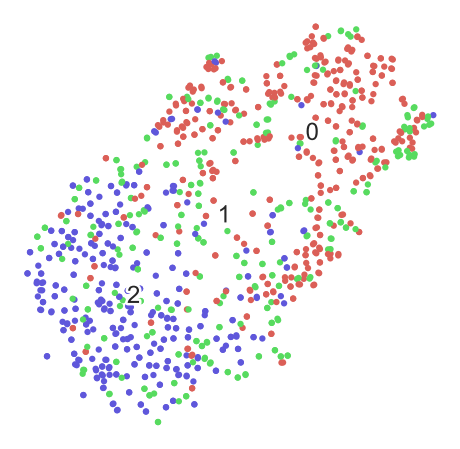

In [22]:
fashion_tsne = TSNE(random_state=RS, n_jobs=-1).fit_transform(Xtrain)

f, ax, sc, txts = fashion_scatter(fashion_tsne, Ytrain)
f.show()

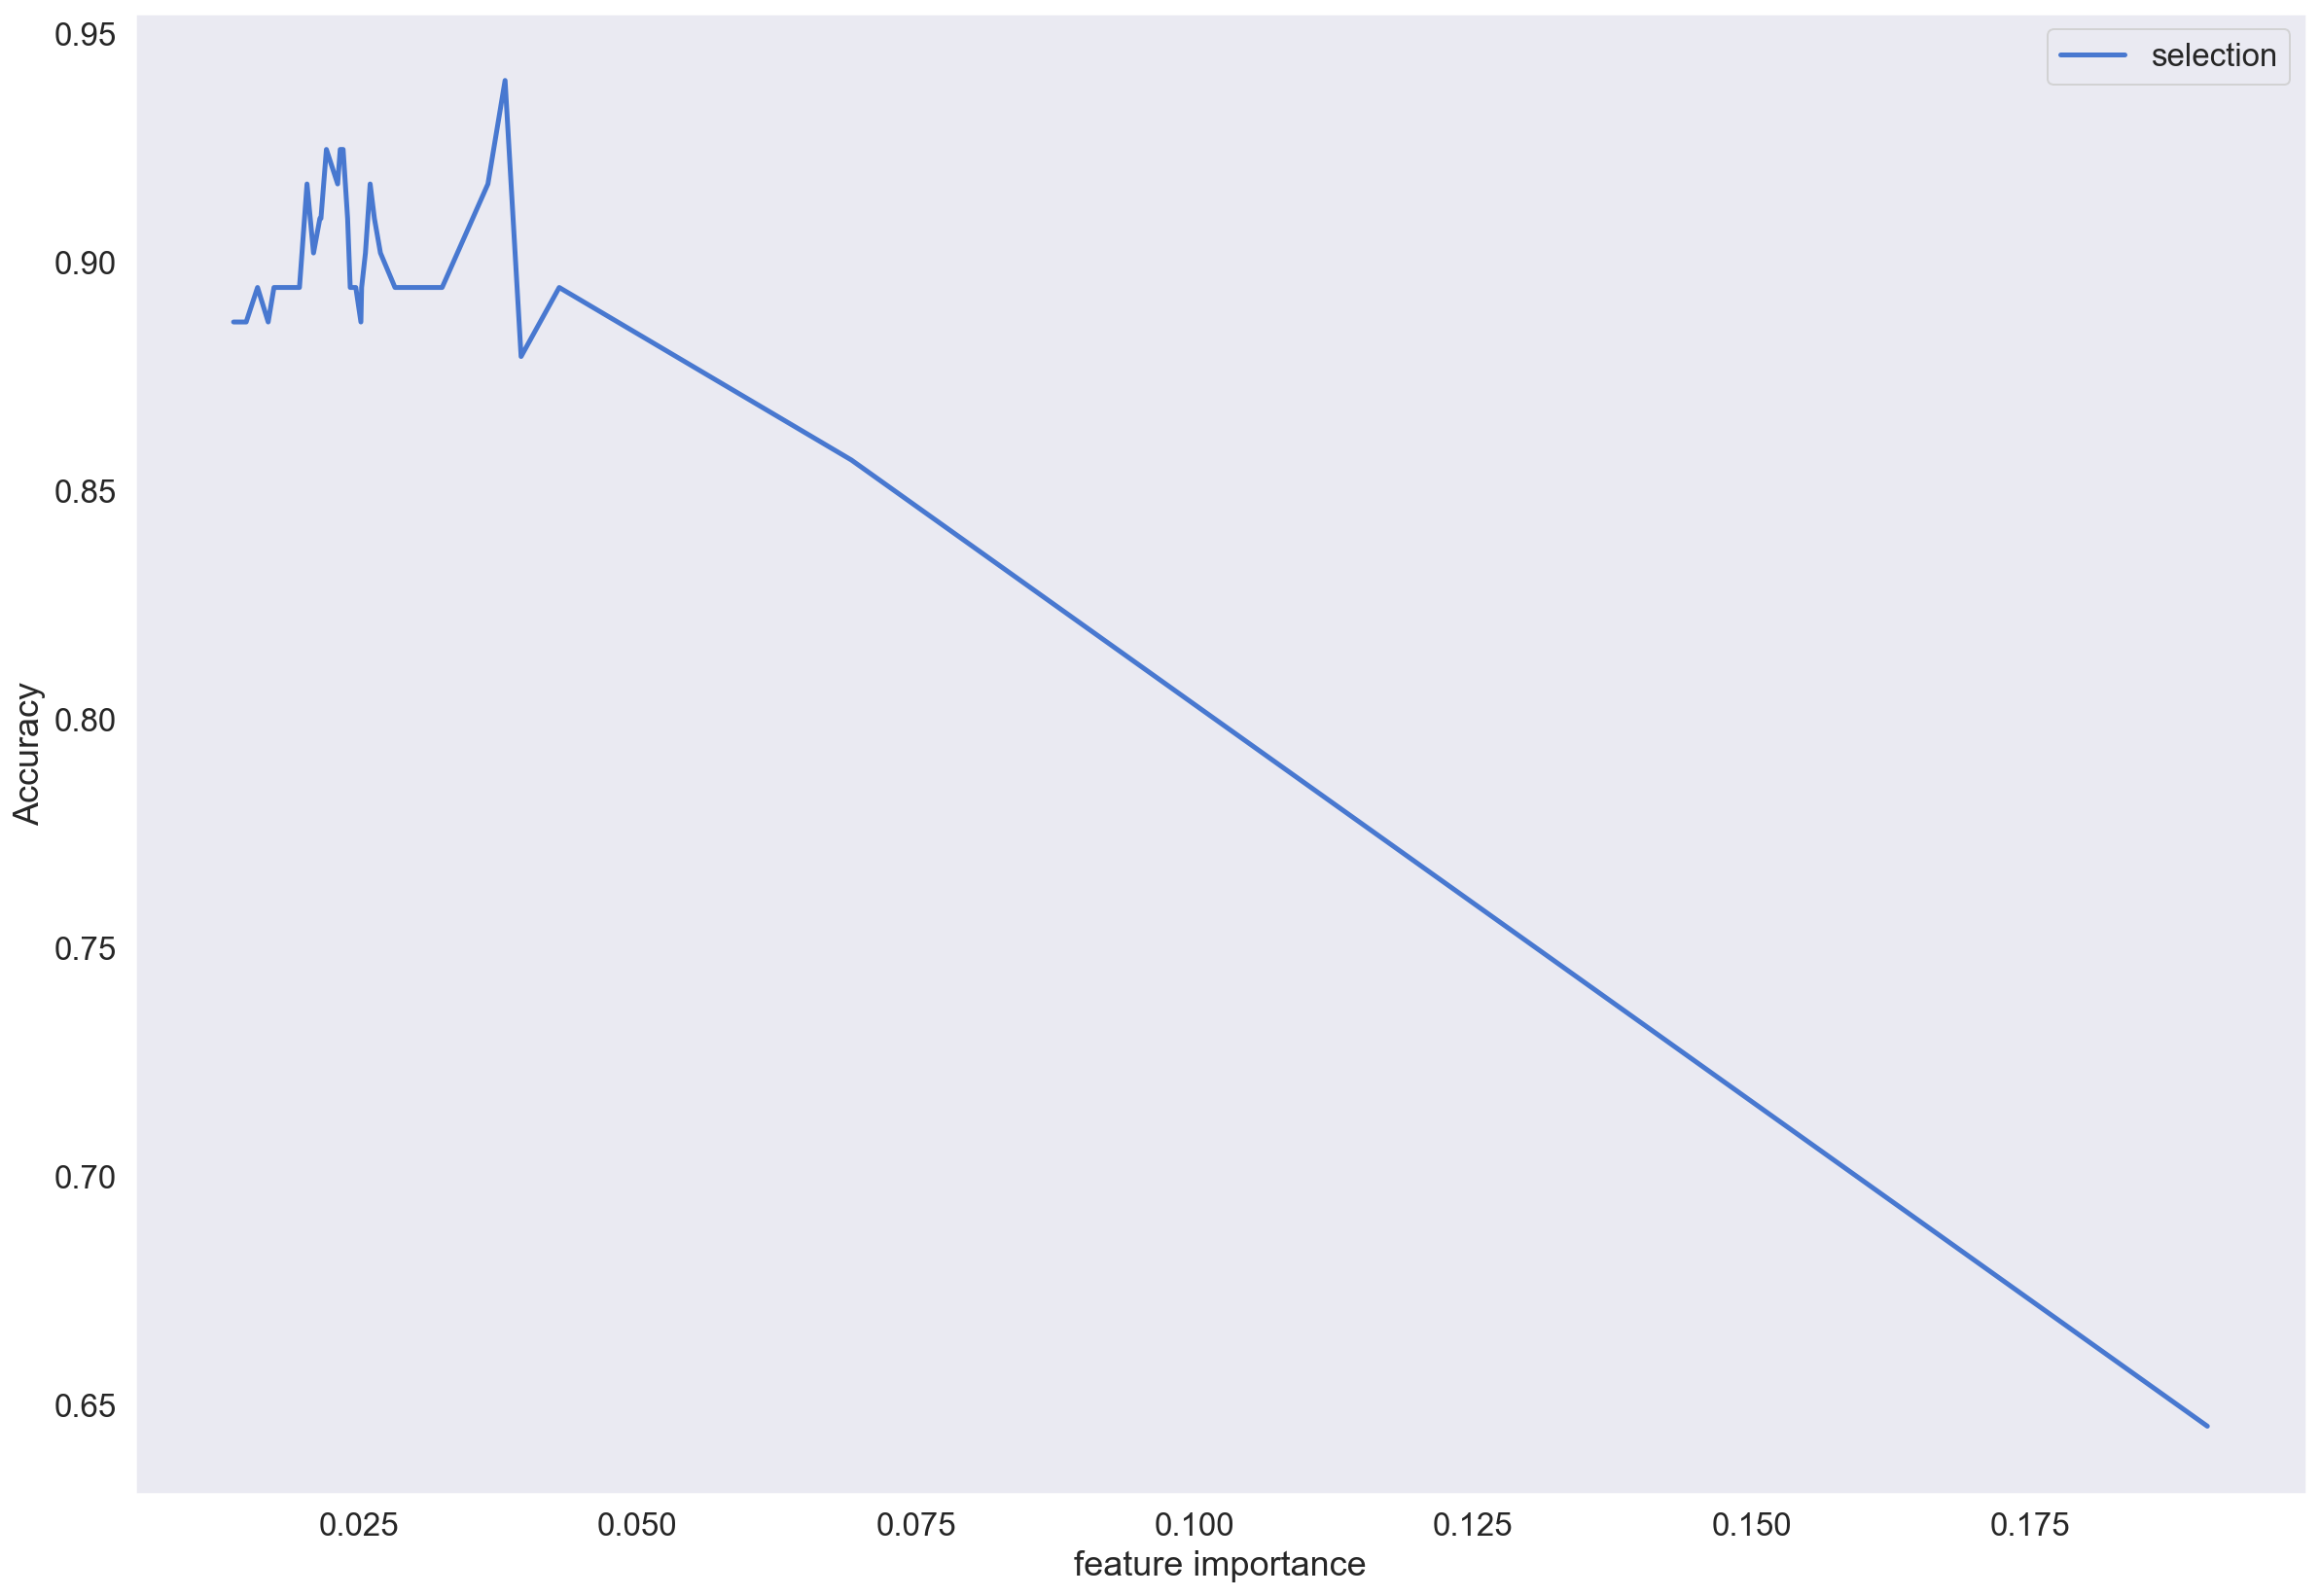

In [23]:
import matplotlib.pyplot as plt



plt.show()
plt.figure(figsize=(20,14), dpi=144)
plt.grid()
plt.xlabel("feature importance")
plt.ylabel("Accuracy")
plt.plot( thresholds,acc, label='selection')

plt.legend()

In [24]:
print(Ytest)
a=np.count_nonzero(Ytest == 1)#Neg
b=np.count_nonzero(Ytest == 2)#Pos
c=np.count_nonzero(Ytest == 0)#Neu
print(a)
print(b)
print(c)

1148    0.0
666     2.0
498     1.0
424     2.0
801     1.0
       ... 
1233    1.0
1204    1.0
721     2.0
245     1.0
516     0.0
Name: Label, Length: 265, dtype: float64
74
93
98


In [25]:
#多分类：混淆矩阵

from sklearn.metrics import confusion_matrix

cfm = confusion_matrix(Ytest,y_pred)
cfm_normalized = cfm.astype('float') / cfm.sum(axis=1)[:, np.newaxis]
print(cfm_normalized)
print(cfm)

[[0.78571429 0.14285714 0.07142857]
 [0.40540541 0.32432432 0.27027027]
 [0.11827957 0.12903226 0.75268817]]
[[77 14  7]
 [30 24 20]
 [11 12 70]]


<AxesSubplot:>

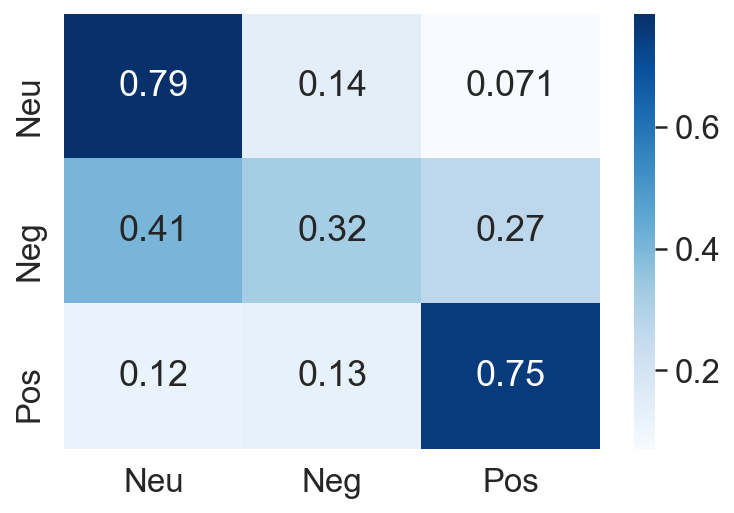

In [26]:
import seaborn as sns

labels=["Neu","Neg","Pos"]
plt.figure(figsize=(6,4), dpi=144)
sns.heatmap(cfm_normalized,annot=True,cmap='Blues',xticklabels=labels,yticklabels= labels)

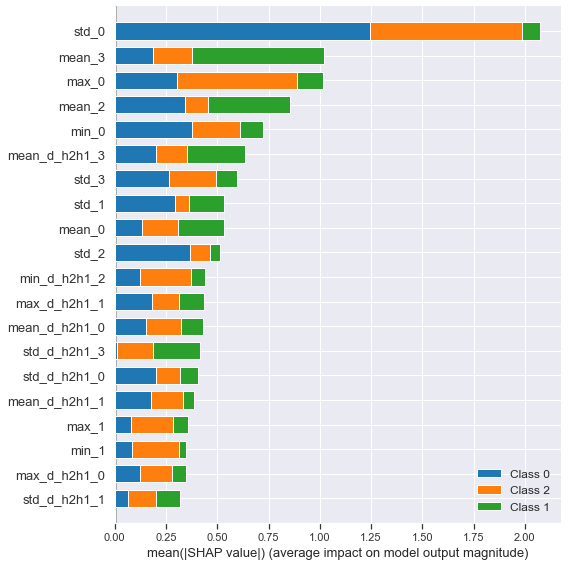

array([[-2.93420553e-01, -9.81818810e-02, -2.83144444e-01,
        -7.54670620e-01,  7.67584816e-02, -4.90866974e-02,
         1.90701634e-02, -2.65936226e-01, -1.35186747e-01,
         2.67269164e-02, -7.33491704e-02,  2.29270868e-02,
        -4.04966585e-02,  9.04897749e-02, -1.95344426e-02,
        -3.89958233e-01, -2.71650821e-01,  9.56982821e-02,
         3.82461399e-03, -7.32744858e-02,  2.54707843e-01,
         2.49239057e-01,  1.75497621e-01, -4.70580533e-04,
        -1.61467701e-01, -4.02581599e-03, -5.91227375e-02,
         5.15356176e-02,  2.39536315e-02, -4.41933349e-02,
        -4.53733578e-02, -7.94470385e-02],
       [-1.83361650e-01, -8.00138786e-02,  2.28045672e-01,
         7.43188858e-01,  6.66191429e-03,  3.82134430e-02,
        -1.02328165e-02, -3.86465564e-02, -2.87698567e-01,
         1.07794136e-01, -2.51185223e-02, -3.36630523e-01,
        -2.06198283e-02, -4.68721148e-04, -7.18297511e-02,
        -2.11840883e-01, -4.54292536e-01,  3.86726037e-02,
        -1.34

In [27]:
import shap
import matplotlib.pyplot as pl


explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(Xtrain)

shap.summary_plot(shap_values, Xtrain,color=pl.get_cmap("tab10"))
shap_values[1][:2,:]#表示前两个样本对于输出标签为1的shap值

# ---------------------------分割线-----------------------------

# Embedded嵌入法

In [28]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as RFC

In [29]:
RFC_ = RFC(n_estimators=10,random_state=0)  # 随机森林实例化

In [30]:
x = data_.iloc[:,:-2]
y = data_.iloc[:,-1]
x.shape

NameError: name 'data_' is not defined

* 阈值为0.005

In [ ]:
x_embedded = SelectFromModel(RFC_,threshold=0.005).fit_transform(x,y)
#在这里我只想取出来有限的特征。0.005这个阈值对于有780个特征的数据来说，是非常高的阈值，因为平均每个特征
# 只能够分到大约0.001的feature_importances_

In [ ]:
x_embedded.shape
#模型的维度明显被降低了
#同样的，我们也可以画学习曲线来找最佳阈值

In [ ]:
RFC_.fit(x,y).feature_importances_

In [ ]:
(RFC_.fit(x,y).feature_importances_).max()

In [ ]:
# 绘制学习曲线
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
RFC_.fit(x,y).feature_importances_
threshold = np.linspace(0,(RFC_.fit(x,y).feature_importances_).max(),20)
#0 - feature_importances_ 范围中取20个数

score = []
for i in threshold:
    x_embedded = SelectFromModel(RFC_,threshold=i).fit_transform(x,y) # 随机森林实例化
    once = cross_val_score(RFC_,x_embedded,y,cv=5).mean()  # 交叉验证5次
    score.append(once)
plt.plot(threshold,score)
plt.show()

In [ ]:
threshold

In [ ]:
x_embedded = SelectFromModel(RFC_,threshold=0.00870999).fit_transform(x,y)

In [ ]:
x_embedded.shape

In [ ]:
cross_val_score(RFC_,x_embedded,y,cv=5).mean()

In [ ]:
# 确定准确率最高threshold值


score2 = []
for i in np.linspace(0,0.00870999,20):
    x_embedded = SelectFromModel(RFC_,threshold=i).fit_transform(x,y)
    once = cross_val_score(RFC_,x_embedded,y,cv=5).mean()
    score2.append(once)
plt.figure(figsize=[20,5])
plt.plot(np.linspace(0,0.00870999,20),score2)
plt.xticks(np.linspace(0,0.00870999,20))
plt.show()

In [ ]:
x_embedded = SelectFromModel(RFC_,threshold=0.003209).fit_transform(x,y)

In [ ]:
x_embedded.shape

In [ ]:
cross_val_score(RFC_,x_embedded,y,cv=5).mean()

In [ ]:
cross_val_score(RFC(n_estimators=100,random_state=0),x_embedded,y,cv=5).mean()

* 阈值为0.001

In [ ]:
x_embedded = SelectFromModel(RFC_,threshold=0.001).fit_transform(x,y)
#在这里我只想取出来有限的特征。0.005这个阈值对于有780个特征的数据来说，是非常高的阈值，因为平均每个特征
# 只能够分到大约0.001的feature_importances_

In [ ]:
x_embedded.shape

In [ ]:
RFC_.fit(x,y).feature_importances_

In [ ]:
(RFC_.fit(x,y).feature_importances_).max()

In [ ]:
# 绘制学习曲线
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
RFC_.fit(x,y).feature_importances_
threshold = np.linspace(0,(RFC_.fit(x,y).feature_importances_).max(),20)
#0 - feature_importances_ 范围中取20个数

score = []
for i in threshold:
    x_embedded = SelectFromModel(RFC_,threshold=i).fit_transform(x,y) # 随机森林实例化
    once = cross_val_score(RFC_,x_embedded,y,cv=5).mean()  # 交叉验证5次
    score.append(once)
plt.plot(threshold,score)
plt.show()

In [ ]:
threshold

# Wrapper包装法

In [ ]:
from sklearn.feature_selection import RFE
RFC_ = RFC(n_estimators=10,random_state=0)
selector = RFE(RFC_,n_features_to_select=22,step=5).fit(x,y)  # 每迭代一次删除掉50个特征

In [ ]:
selector.support_.sum() #.support_：返回所有的特征的是否最后被选中的布尔矩阵

In [ ]:
selector.ranking_   #返回特征的按数次迭代中综合重要性的排名,越重要的特征排在前面

In [ ]:
x_wrapper = selector.transform(x)

In [ ]:
cross_val_score(RFC_,x_wrapper,y,cv=5).mean()

In [ ]:
# 绘制学习曲线
score = []
for i in range(1,751,50):
    x_wrapper = RFE(RFC_,n_features_to_select=i, step=50).fit_transform(x,y)
    once = cross_val_score(RFC_,x_wrapper,y,cv=5).mean()
    score.append(once)
plt.figure(figsize=[20,5])
plt.plot(range(1,751,50),score)
plt.xticks(range(1,751,50))
plt.show()